## A framework for comparing dst files with root files

In [ ]:
import uproot
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
dir_dsts = 'dsts'
dir_root = 'root'

Get anumu, numu, mu data from dsts (change file names)

In [2]:
#anumu_dsts1 = dir_dsts +  "/eval/mcv8.1_ml.gold_silver.gsg_anumu-CCHEDIS_1e2-1e8GeV.sirene.jterbr.jchain.aashower.dst.root"
#numu_dsts1 = dir_dsts +  "/eval/mcv8.1_ml.gold_silver.gsg_numu-CCHEDIS_1e2-1e8GeV.sirene.jterbr.jchain.aashower.dst.root"
anumu_dsts2 = dir_dsts +  "/mcv8.1_ml.gold_silver.gsg_anumu-CCHEDIS_1e2-1e8GeV.sirene.jterbr.jchain.aashower.dst.root"
numu_dsts2 = dir_dsts +  "/mcv8.1_ml.gold_silver.gsg_numu-CCHEDIS_1e2-1e8GeV.sirene.jterbr.jchain.aashower.dst.root"
mu_dsts1 = dir_dsts +  "/train/mcv8.1_ml.gold_silver.mupage_tuned_100G.sirene.jterbr.jchain.aashower.dst.root"
mu_dsts2 = dir_dsts +  "/train/mcv8.1_ml_2.gold_silver.mupage_tuned_100G.sirene.jterbr.jchain.aashower.dst.root"
mu_dsts3 = dir_dsts +  "/train/mcv8.1_ml_3.gold_silver.mupage_tuned_100G.sirene.jterbr.jchain.aashower.dst.root"
mu_dsts4 = dir_dsts +  "/train/mcv8.1.1_ml.gold_silver.mupage_tuned_100G.sirene.jterbr.jchain.aashower.dst.root"
mu_dsts5 = dir_dsts +  "/train/mcv8.1.1_ml2.gold_silver.mupage_tuned_100G.sirene.jterbr.jchain.aashower.dst.root"
anumu_dsts1 = dir_dsts + "/eval/mcv8.1.all.gsg_anumu-CCHEDIS_1e2-1e8GeV.sirene.jterbr.jchain.aashower.dst.root"
numu_dsts1 = dir_dsts + "/eval/mcv8.1.all.gsg_numu-CCHEDIS_1e2-1e8GeV.sirene.jterbr.jchain.aashower.dst.root"
anm_dsts_1 = uproot.open(anumu_dsts1)['E;1']
nm_dsts_1 = uproot.open(numu_dsts1)['E;1']
anm_dsts_2 = uproot.open(anumu_dsts2)['E;1']
nm_dsts_2 = uproot.open(numu_dsts2)['E;1']

m_dsts_1 = uproot.open(mu_dsts1)['E;1']
m_dsts_2 = uproot.open(mu_dsts2)['E;1']
m_dsts_3 = uproot.open(mu_dsts3)['E;1']
m_dsts_4 = uproot.open(mu_dsts4)['E;1']
m_dsts_5 = uproot.open(mu_dsts5)['E;1']

nm_dsts = [nm_dsts_1, nm_dsts_2]
anm_dsts = [anm_dsts_1, anm_dsts_2]
n_dsts = nm_dsts + anm_dsts
m_dsts = [m_dsts_1, m_dsts_2, m_dsts_3, m_dsts_4, m_dsts_5]

Get anumu, mu data from root files

In [3]:
anumu_root = dir_root +  "/a-nu_Mu_CC_All_ARCA21_v8.1_preproc.root"
mu_root = dir_root +  "/muons_All_ARCA21_v8.1_preproc.root"
anm_root = uproot.open(anumu_root)['ProcessedEvents;1']
m_root = uproot.open(mu_root)['ProcessedEvents;1']

### A function to get histograms of several variables for specific run_id from root files

vars: jlikelihood, Slen, logbeta0, cosine_zenith

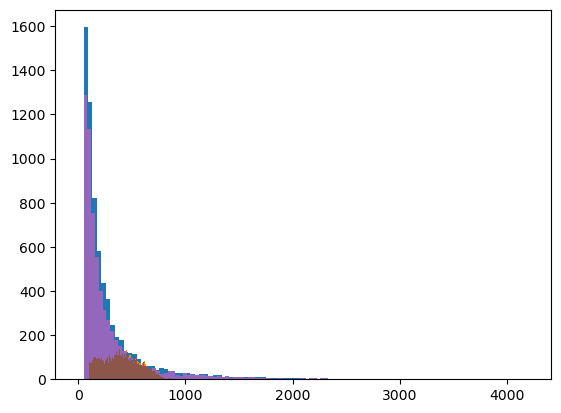

In [41]:
def cuts_for_root(fi,run, type=-14):
    ret_list = []
    zenith = fi['zenith']
    df = zenith.arrays(library = 'pd')
    cos_zen = fi['cos_zen'].arrays(library = 'pd')
    run_ids = fi['pseudo_runid'].arrays(library = 'pd')
    logb0 = fi['logbeta0'].arrays(library = 'pd')
    Slens = fi['Slen'].arrays(library = 'pd')
    liks = fi['jlik'].arrays(library = 'pd')
    ntype = fi['neutrino_type'].arrays(library = 'pd')
    all = pd.concat([df, run_ids, logb0, Slens, liks, ntype, cos_zen], axis=1, join='inner')
    all = all.loc[(all['pseudo_runid']==run) & (all['jlik']>50) & (all['Slen']>100) & (all['logbeta0']<-1.5)\
              & (all['neutrino_type'] == type)] #& (all['zenith']>90)
            
    l2 = np.array((all['jlik'].tolist()))
    plt1 = plt.hist(l2, 100)
    ret_list += [plt1]
    l2 = np.array((all['Slen'].tolist()))
    plt1 = plt.hist(l2, 100)
    ret_list += [plt1]
    l2 = np.array((all['logbeta0'].tolist()))
    plt1 = plt.hist(l2, 100)
    ret_list += [plt1]
    l2 = np.array((all['cos_zen'].tolist()))
    plt1 = plt.hist(l2, 100)
    ret_list += [plt1]
    #plt.show()
    return len(l2), ret_list

l_root_anm, plts_root_anm = cuts_for_root(anm_root, 13288)
l_root_nm, plts_root_nm = cuts_for_root(anm_root, 13288, 14)

### A function to get histograms of several variables for specific run_id from dst files

In [43]:
def cuts_for_dsts(fi, run):
    list_ret = []
    run_ids = fi['run_id'].arrays(library = 'pd')
    #zenith = fi['zenith'].arrays(library = 'pd')
    mc_run_ids = fi['mc_run_id'].arrays(library = 'pd')
    ids = fi['id'].arrays(library = 'pd')
    lkld = fi['trks.lik']
    df = pd.DataFrame(lkld.arrays(library = 'np'))
    #cos zenith = trackfit.dir.z
    trks_z = pd.DataFrame(fi['trks.dir.z'].arrays(library = 'np'))
   
    #Slength = trackfit.len or trks.len

    fitinf = fi['Evt/trks/trks.fitinf'].arrays(library = 'pd')
    # logbeta0 = betazero/angular resolution???

    #lik_run = pd.concat([df, run_ids], axis=1, join='inner')
    all = pd.concat([df, run_ids, ids, trks_z, fitinf], axis = 1, join = 'inner') 
    Slen = np.array((all['trks.fitinf']).apply(lambda x: (list(x[0]))[10] if len(list(x[0]))>= 10 else None ))
    trks = np.array(all['trks.lik'].apply(lambda x: (x[0])))
    beta0 = np.array((all['trks.fitinf']).apply(lambda x: ((list(x[0]))[0] if len(list(x[0]))>= 1 and (list(x[0]))[0]!=0 else None )))

    all = all.loc[(all['run_id'] == run) & (trks > 50)  & (Slen > 100) & (np.log10(beta0) < -1.5)] # & (all['trks.dir.z'].to_numpy()[:, 0] > 0)]
    
    #temp = lik_run.loc[(lik_run['run_id'] == run) & (lik_run['trks.lik'].to_numpy()[:, 0] > 50)]
    l2 = np.array(all['trks.lik'].apply(lambda x: (x[0])))
    plt1 = plt.hist(l2, 100)
    list_ret += [plt1]
    Slen = np.array((all['trks.fitinf']).apply(lambda x: (list(x[0]))[10] if len(list(x[0]))>= 10 else None ))
    beta0 = np.array((all['trks.fitinf']).apply(lambda x: ((list(x[0]))[0] if len(list(x[0]))>= 1 else None )))
    list_ret += [plt.hist(Slen, 100)]
    list_ret += [plt.hist(np.log10(beta0), 100)]
    l2 = - np.array(all['trks.dir.z'].apply(lambda x: (x[0])))
    plt1 = plt.hist(l2, 100)
    list_ret += [plt1]
    #plt.show()
    #return len(l2), plt1
    return len(l2), list_ret
l_dsts_anm, plts_dsts_anm = cuts_for_dsts(anm_dsts_1, 13288)

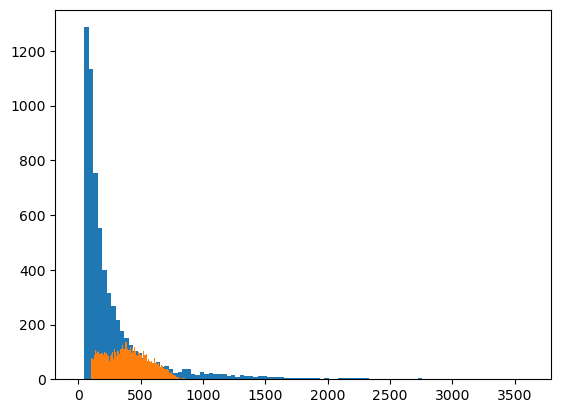

In [44]:
l_dsts_nm, plts_dsts_nm = cuts_for_dsts(nm_dsts_1, 13288)

check results for anumu 1 run, overlay histograms from the two files

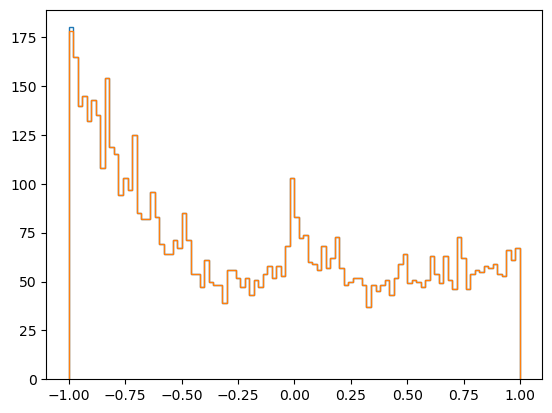

In [21]:
plt.stairs(plts_dsts_anm[3][0], plts_dsts_anm[3][1])
plt.stairs(plts_root_anm[3][0], plts_root_anm[3][1])
#plts3[2][1], plts1[2][1]

Plot the ratio for each bin for the 4 histograms. It should be aproximately one.

6936 6938


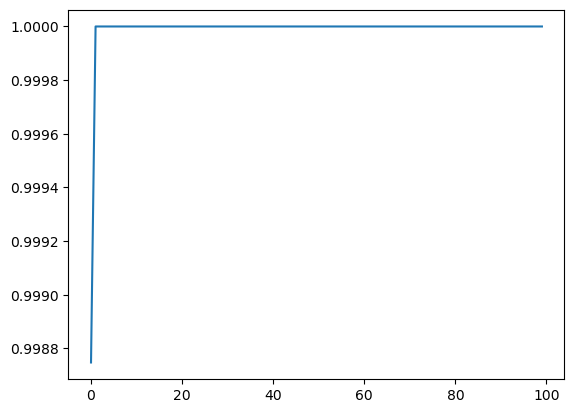

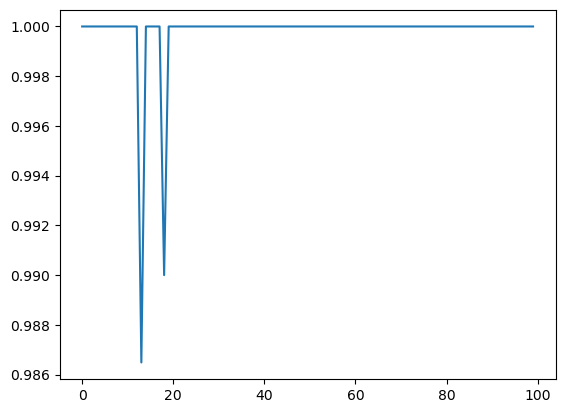

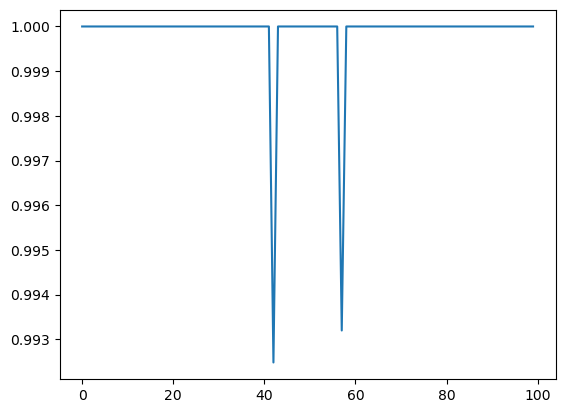

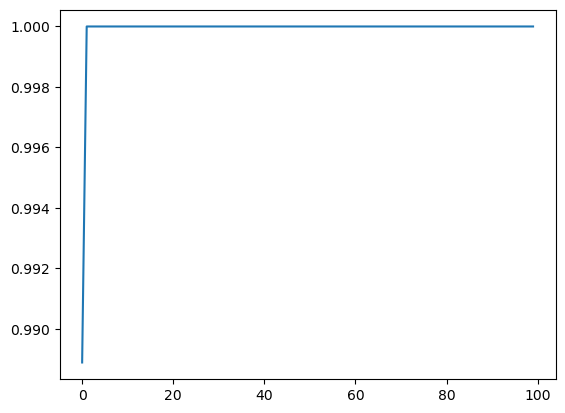

In [36]:
print(l_root_anm, l_dsts_anm)
#likelihood
plt.plot([plts_root_anm[0][0][i] / j if j!=0 else 0 if plts_root_anm[0][0][i]!=0 else 1 for i, j in enumerate(plts_dsts_anm[0][0])])
plt.show()
#length
plt.plot([plts_root_anm[1][0][i] / j if j!=0 else 0 if plts_root_anm[1][0][i]!=0 else 1 for i, j in enumerate(plts_dsts_anm[1][0])])
plt.show()
#logbeta0
plt.plot([plts_root_anm[2][0][i] / j if j!=0 else 0 if plts_root_anm[2][0][i]!=0 else 1 for i, j in enumerate(plts_dsts_anm[2][0])])
plt.show()
#cos_zen
plt.plot([plts_root_anm[3][0][i] / j if j!=0 else 0 if plts_root_anm[3][0][i]!=0 else 1 for i, j in enumerate(plts_dsts_anm[3][0])])
plt.show()

### The same procedure for numu events

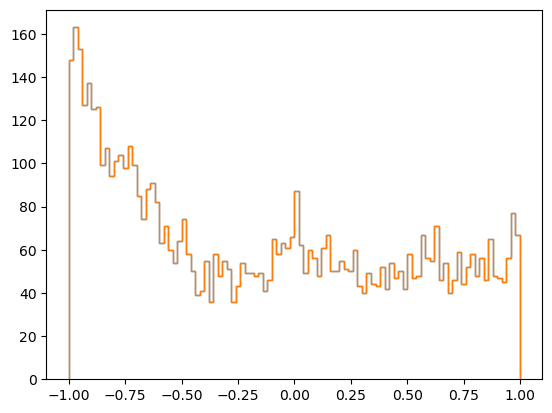

In [46]:
plt.stairs(plts_dsts_nm[3][0], plts_dsts_nm[3][1])
plt.stairs(plts_root_nm[3][0], plts_root_nm[3][1])
#plts3[2][1], plts1[2][1]

6482 6482


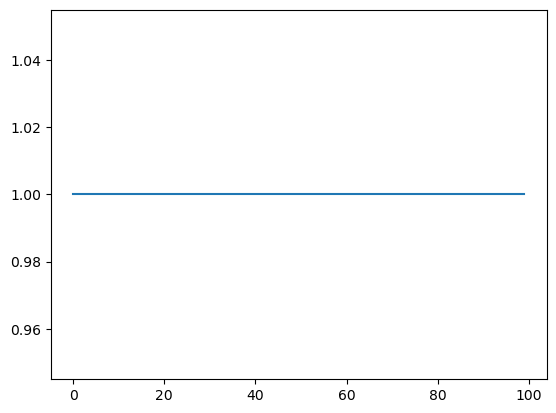

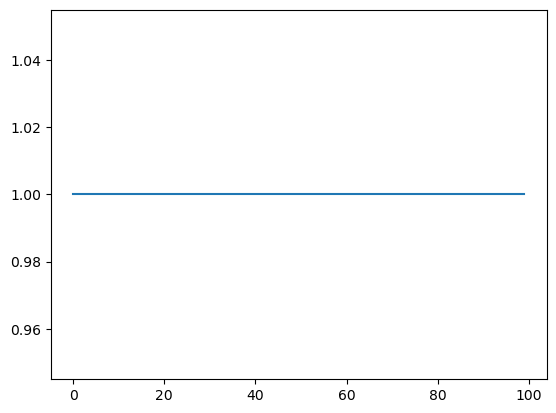

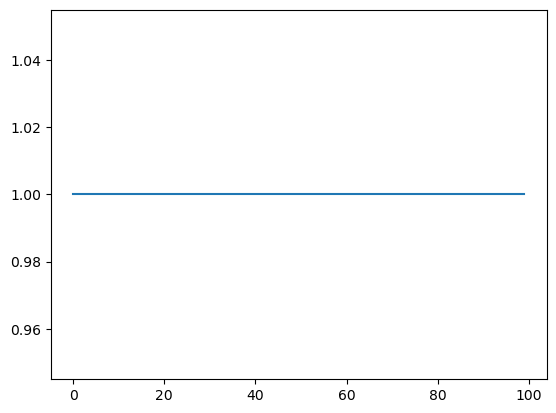

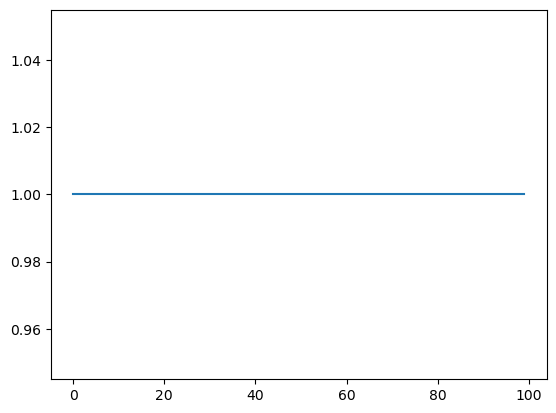

In [47]:
print(l_root_nm, l_dsts_nm)
#likelihood
plt.plot([plts_root_nm[0][0][i] / j if j!=0 else 0 if plts_root_nm[0][0][i]!=0 else 1 for i, j in enumerate(plts_dsts_nm[0][0])])
plt.show()
#length
plt.plot([plts_root_nm[1][0][i] / j if j!=0 else 0 if plts_root_nm[1][0][i]!=0 else 1 for i, j in enumerate(plts_dsts_nm[1][0])])
plt.show()
#logbeta0
plt.plot([plts_root_nm[2][0][i] / j if j!=0 else 0 if plts_root_nm[2][0][i]!=0 else 1 for i, j in enumerate(plts_dsts_nm[2][0])])
plt.show()
#cos_zen
plt.plot([plts_root_nm[3][0][i] / j if j!=0 else 0 if plts_root_nm[3][0][i]!=0 else 1 for i, j in enumerate(plts_dsts_nm[3][0])])
plt.show()

### Now we do the same for all runs written in a csv file

In [53]:
csv_name = "root/runsARCA21_v8.1_GoldenRuns_22Sep22_20Dec22_preliminary.csv"
csv_ids = pd.read_csv(csv_name)['id'].tolist()

For root first

[]
[]


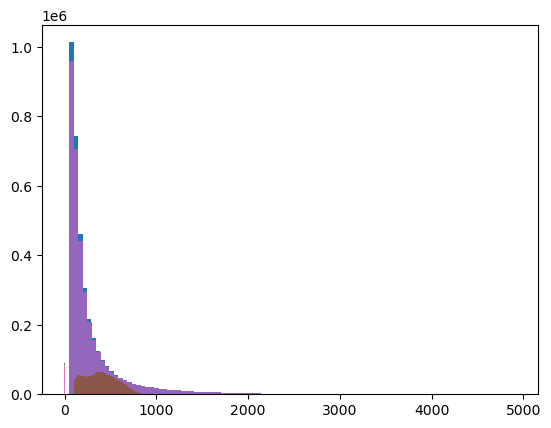

In [56]:
def cuts_for_root_csv(fi, csv_ids, type = -14):
    fi_ids = np.sort(fi['pseudo_runid'].arrays(library = 'pd')['pseudo_runid'].unique())
    fin_ids = [i for i in csv_ids if i in fi_ids]

    ret_list = []
    zenith = fi['zenith']
    df = zenith.arrays(library = 'pd')
    cos_zen = fi['cos_zen'].arrays(library = 'pd')
    run_ids = fi['pseudo_runid'].arrays(library = 'pd')
    logb0 = fi['logbeta0'].arrays(library = 'pd')
    Slens = fi['Slen'].arrays(library = 'pd')
    liks = fi['jlik'].arrays(library = 'pd')
    ntype = fi['neutrino_type'].arrays(library = 'pd')
    all = pd.concat([df, run_ids, logb0, Slens, liks, ntype, cos_zen], axis=1, join='inner')
    
    mruns = pd.DataFrame()
    for run in fin_ids:
        mruns = pd.concat([mruns, all.loc[(all['pseudo_runid'] == run)]], ignore_index=True)
    
    all = mruns
    all = all.loc[(all['jlik']>50) & (all['Slen']>100) & (all['logbeta0']<-1.5)\
              & (all['neutrino_type'] == type)] #& (all['zenith']>90)]
    
    print([i for i in np.sort(all['pseudo_runid'].unique()) if i not in csv_ids])
            
    l2 = np.array((all['jlik'].tolist()))
    plt1 = plt.hist(l2, 100)
    ret_list += [plt1]
    l2 = np.array((all['Slen'].tolist()))
    plt1 = plt.hist(l2, 100)
    ret_list += [plt1]
    l2 = np.array((all['logbeta0'].tolist()))
    plt1 = plt.hist(l2, 100)
    ret_list += [plt1]
    l2 = np.array((all['cos_zen'].tolist()))
    plt1 = plt.hist(l2, 100)
    ret_list += [plt1]
    #plt.show()
    return len(l2), ret_list, all
l_root_anm_csv, plts_root_anm_csv, all_root_anm_csv = cuts_for_root_csv(anm_root, csv_ids)
l_root_nm_csv, plts_root_nm_csv, all_root_nm_csv = cuts_for_root_csv(anm_root, csv_ids, 14)

For dsts now

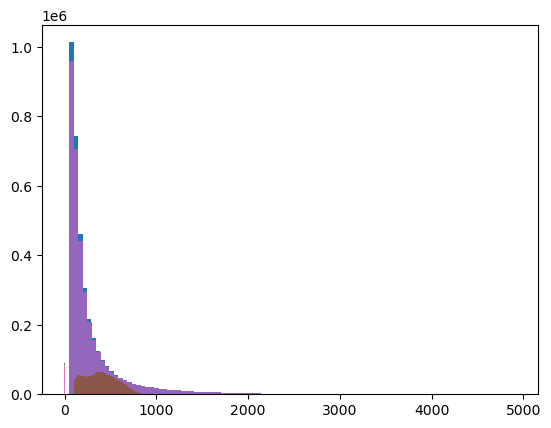

In [63]:
def cuts_for_dsts_csv(fi, csv_ids):
    list_ret = []
    fi_ids = np.sort(fi['run_id'].arrays(library = 'pd')['run_id'].unique())
    fin_ids = [i for i in csv_ids if i in fi_ids]
    run_ids = fi['run_id'].arrays(library = 'pd')
    ids = fi['id'].arrays(library = 'pd') 
    df = pd.DataFrame(fi['trks.lik'].arrays(library = 'np'))
    #cos zenith = - trackfit.dir.z
    trks_z = pd.DataFrame(fi['trks.dir.z'].arrays(library = 'np'))

    #Slength = trackfit.len or trks.len

    fitinf = fi['Evt/trks/trks.fitinf'].arrays(library = 'pd')


    all = pd.concat([df, run_ids, ids, trks_z, fitinf], axis = 1, join = 'inner') 


    Slen = np.array((all['trks.fitinf']).apply(lambda x: (list(x[0]))[10] if len(list(x[0]))>= 10 else None ))
    Elen = np.array((all['trks.fitinf']).apply(lambda x: (list(x[0]))[13] if len(list(x[0]))>= 13 else None ))
    #Slen = np.array(fitinf['trks.fitinf'].apply(lambda x: (list(x[0]))[10] if len(list(x[0]))>= 10 else None ))
    trks = np.array(all['trks.lik'].apply(lambda x: (x[0])))
    beta0 = np.array((all['trks.fitinf']).apply(lambda x: ((list(x[0]))[0] if (len(list(x[0]))>= 1 and (list(x[0])[0] != 0)) else 1000 if (len(list(x[0]))>= 1) else 1000 )))
    #beta0 = np.array((fitinf['trks.fitinf']).apply(lambda x: ((list(x[0]))[0] if (len(list(x[0]))>= 1 and (list(x[0])[0] != 0)) else 1000 if (len(list(x[0]))>= 1) else 1000 )))
    tv = (all['run_id'] == fin_ids[0])
    for run in fin_ids[1:]:
        tv = tv | (all['run_id'] == run)
    #tv = (run_ids['run_id'] == fin_ids[0])
    #for run in fin_ids[1:]:
    #    tv = tv | (run_ids['run_id'] == run)

    tv_beta0 = np.array(all['trks.fitinf'].apply(lambda x: (len(list(x[0]))>= 1)))
    cond = tv & tv_beta0  & (trks > 50) & (Slen > 100) & (np.log10(beta0) < -1.5) & (Elen > 0) #& (all['trks.dir.z'].to_numpy()[:, 0] > 0)
    all = all.loc[cond]

    #tv_beta0 = np.array(fitinf['trks.fitinf'].apply(lambda x: (len(list(x[0]))>= 1)))
    #cond = tv & tv_beta0 & (df['trks.lik'].to_numpy()[:, 0] > 50)  & (Slen > 100) & (np.log10(beta0) < -1.5) & (trks_z['trks.dir.z'].to_numpy()[:, 0] > 0)
    

    l2 = np.array(all['trks.lik'].apply(lambda x: (x[0])))
    #l2 = np.array((df[cond]['trks.lik'].tolist()))[:,0]
    plt1 = plt.hist(l2, 100)
    list_ret += [plt1]

    list_ret += [plt.hist(Slen[cond], 100)]
    list_ret += [plt.hist(np.log10(beta0[cond]), 100)]
    l2 = - np.array(all['trks.dir.z'].apply(lambda x: (x[0])))
    #l2 = - trks_z[cond]['trks.dir.z'].to_numpy()[:, 0]
    plt1 = plt.hist(l2, 100)
    list_ret += [plt1]
    #plt.show()
    #return len(l2), plt1
    return len(l2), list_ret, all
l_dsts_anm_csv, plts_dsts_anm_csv, all_dsts_anm = cuts_for_dsts_csv(anm_dsts_1, csv_ids)
l_dsts_nm_csv, plts_dsts_nm_csv, all_dsts_nm = cuts_for_dsts_csv(nm_dsts_1, csv_ids)

check results for anumu all runs

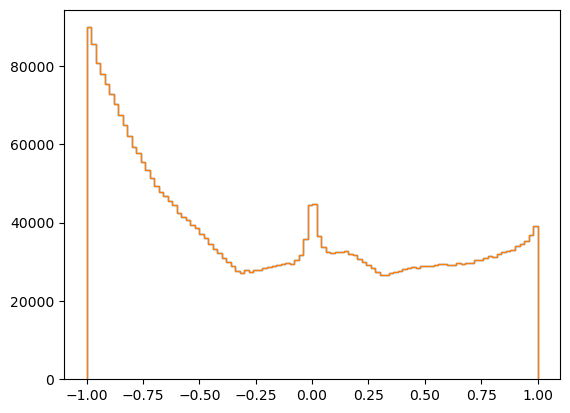

In [64]:
plt.stairs(plts_dsts_anm_csv[3][0], plts_dsts_anm_csv[3][1])
plt.stairs(plts_root_anm_csv[3][0], plts_root_anm_csv[3][1])
#plts3[2][1], plts1[2][1]

3786594 3786596


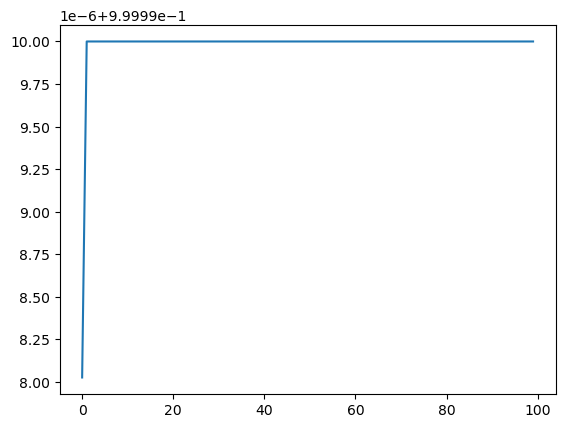

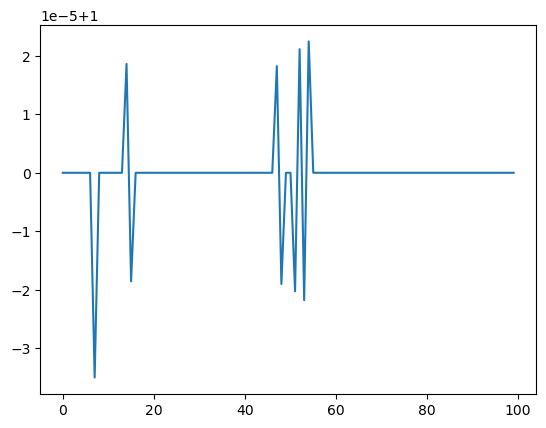

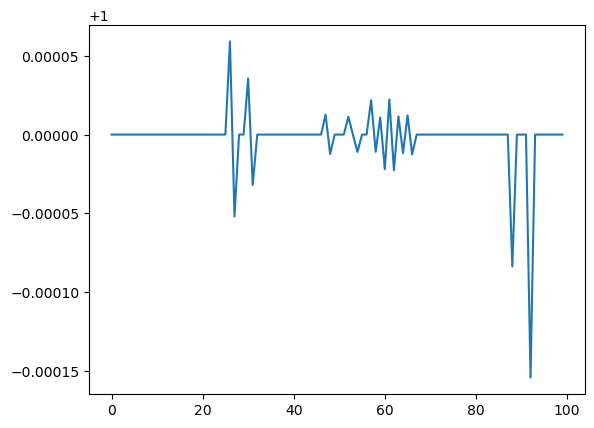

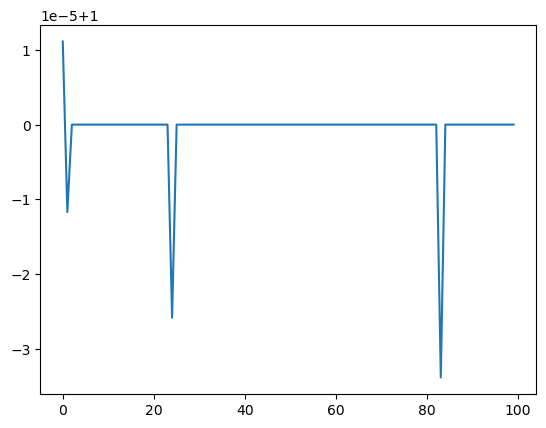

In [65]:
print(l_root_anm_csv, l_dsts_anm_csv)
#likelihood
plt.plot([plts_root_anm_csv[0][0][i] / j if j!=0 else 0 if plts_root_anm_csv[0][0][i]!=0 else 1 for i, j in enumerate(plts_dsts_anm_csv[0][0])])
plt.show()
#length
plt.plot([plts_root_anm_csv[1][0][i] / j if j!=0 else 0 if plts_root_anm_csv[1][0][i]!=0 else 1 for i, j in enumerate(plts_dsts_anm_csv[1][0])])
plt.show()
#logbeta0
plt.plot([plts_root_anm_csv[2][0][i] / j if j!=0 else 0 if plts_root_anm_csv[2][0][i]!=0 else 1 for i, j in enumerate(plts_dsts_anm_csv[2][0])])
plt.show()
#cos_zen
plt.plot([plts_root_anm_csv[3][0][i] / j if j!=0 else 0 if plts_root_anm_csv[3][0][i]!=0 else 1 for i, j in enumerate(plts_dsts_anm_csv[3][0])])
plt.show()

check results for numu all runs

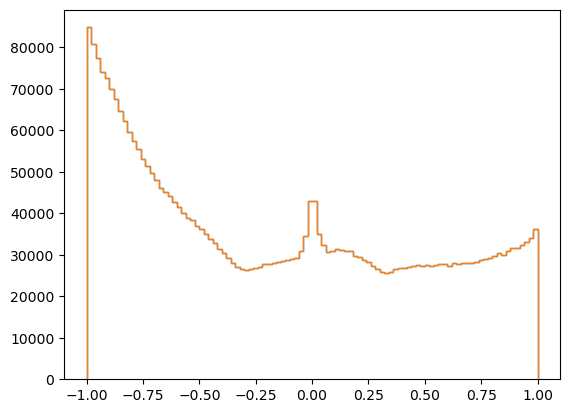

In [66]:
plt.stairs(plts_dsts_nm_csv[3][0], plts_dsts_nm_csv[3][1])
plt.stairs(plts_root_nm_csv[3][0], plts_root_nm_csv[3][1])
#plts3[2][1], plts1[2][1]

3630040 3630047


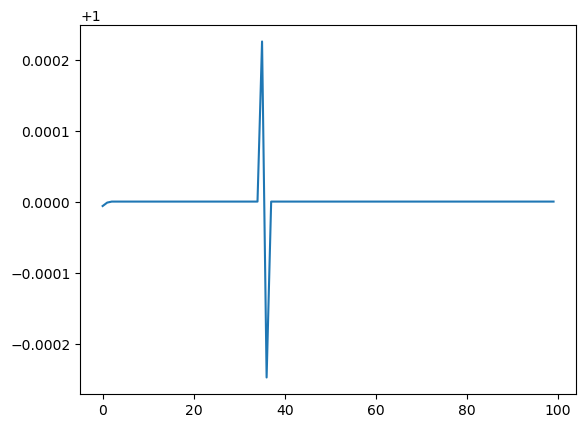

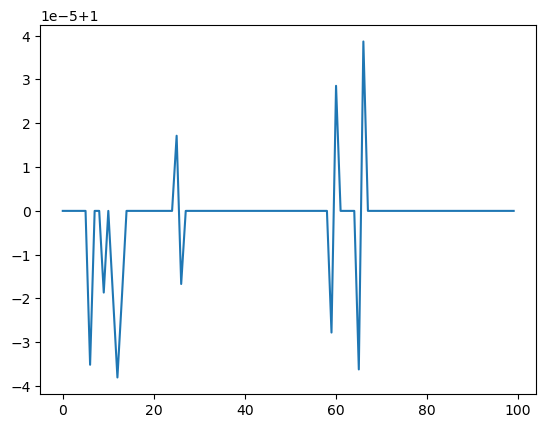

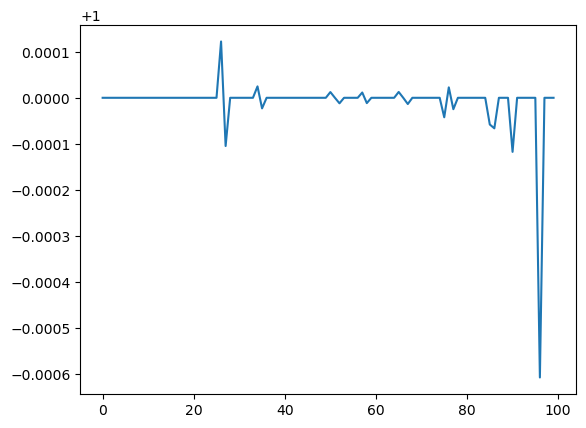

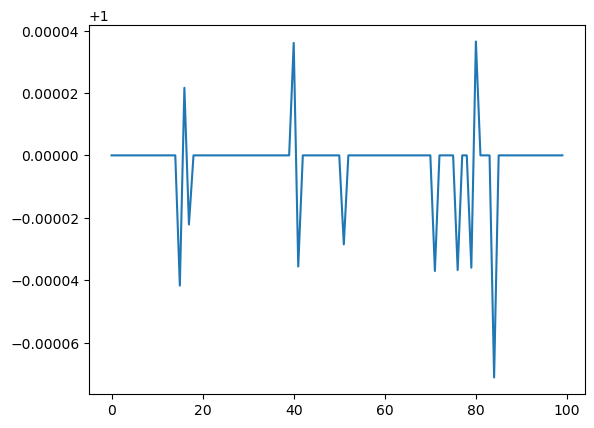

In [67]:
print(l_root_nm_csv, l_dsts_nm_csv)
#likelihood
plt.plot([plts_root_nm_csv[0][0][i] / j if j!=0 else 0 if plts_root_nm_csv[0][0][i]!=0 else 1 for i, j in enumerate(plts_dsts_nm_csv[0][0])])
plt.show()
#length
plt.plot([plts_root_nm_csv[1][0][i] / j if j!=0 else 0 if plts_root_nm_csv[1][0][i]!=0 else 1 for i, j in enumerate(plts_dsts_nm_csv[1][0])])
plt.show()
#logbeta0
plt.plot([plts_root_nm_csv[2][0][i] / j if j!=0 else 0 if plts_root_nm_csv[2][0][i]!=0 else 1 for i, j in enumerate(plts_dsts_nm_csv[2][0])])
plt.show()
#cos_zen
plt.plot([plts_root_nm_csv[3][0][i] / j if j!=0 else 0 if plts_root_nm_csv[3][0][i]!=0 else 1 for i, j in enumerate(plts_dsts_nm_csv[3][0])])
plt.show()